In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix

In [62]:
df = pd.read_csv('C:/Users/FilipeCampos/Desktop/gestao-ia/I.a-vendas-classification/bases/train.csv')

In [63]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [64]:
df.describe()

,VENDIDO
count,78331.00000
mean,0.60732
std,0.48835
min,0.00000
25%,0.00000
50%,1.00000
75%,1.00000
max,1.00000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78331 entries, 0 to 78330
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   marca             77973 non-null  object
 1   nomeDaPeca        78331 non-null  object
 2   precoComDesconto  78331 non-null  object
 3   precoSemDesconto  76821 non-null  object
 4   Descricao         78323 non-null  object
 5   Tamanho           78055 non-null  object
 6   Condicao          78331 non-null  object
 7   Cores             76728 non-null  object
 8   VENDIDO           78331 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 5.4+ MB


In [66]:
df['precoComDesconto'] = pd.to_numeric(df['precoComDesconto'].str.replace('[^0-9.]', '', regex=True), errors='coerce')
df['precoSemDesconto'] = pd.to_numeric(df['precoSemDesconto'].str.replace('[^0-9.]', '', regex=True), errors='coerce')


In [67]:
df['precoComDesconto'] = pd.to_numeric(df['precoComDesconto'])
df['precoSemDesconto'] = pd.to_numeric(df['precoSemDesconto'])


In [68]:
df

,marca,nomeDaPeca,precoComDesconto,precoSemDesconto,Descricao,Tamanho,Condicao,Cores,VENDIDO
0,sem marca,\r\nBlusa Verde Babados\r\n,64.00,160.0,Blusa verde com modelagem básica. Peça com bab...,m,gentilmente usada,verde,0
1,zara,\r\nSaia Lápis Zara\r\n,57.00,219.0,Marca: Zara Woman,38,gentilmente usada,"Detalhe: Dois bolsos frontais, forro, zíper tr...",1
2,1 a 9,\r\nJeans Skinny 1 a 9\r\n,69.00,279.0,"Medidas: cintura 32cm, quadril 43cm, comprime...",38,gentilmente usada,azul,0
3,Coach,Sapatilha Monograma,25000.00,87500.0,Sapatilha caramelo. Possui monograma em toda a...,39,Usado,\r\nCaramelo \r\nPreto \r\n,1
4,primeiro item teen,\r\nShorts Feminino Teen Corações\r\n,20.97,69.9,"Shorts feminino, com estampa de corações, do P...",m,gentilmente usada,colorido,0
...,...,...,...,...,...,...,...,...,...
78326,mandi,\r\nCamisa Preta Mandi\r\n,15.00,69.9,"Camisa feminina, preta, da Mandi. Tecido plano...",m,gentilmente usada,preto,0
78327,mo,\r\nSaia Branca Bordada\r\n,33.75,135.0,"Saia branca com bordados em linha prata, azul ...",p,gentilmente usada,branco,1
78328,luigi bertolli,\r\nVestido Floral Preto e Vermelho Luigi Bert...,27.48,89.9,"Vestido preto com flores vermelhas, da Luigi B...",gg,gentilmente usada,colorido,1
78329,Zara,Blazer Tweed Bege,7000.00,28000.0,"Blazer em tweed, nas cores bege e dourado. Pos...",P,Usado,\r\nBege \r\n,1


In [69]:
df2 = pd.read_csv('C:/Users/FilipeCampos/Desktop/gestao-ia/I.a-vendas-classification/bases/test.csv')

In [70]:
df2['precoComDesconto'] = pd.to_numeric(df2['precoComDesconto'].str.replace('[^0-9.]', '', regex=True), errors='coerce')
df2['precoSemDesconto'] = pd.to_numeric(df2['precoSemDesconto'].str.replace('[^0-9.]', '', regex=True), errors='coerce')


In [71]:
df2['precoComDesconto'] = pd.to_numeric(df['precoComDesconto'])
df2['precoSemDesconto'] = pd.to_numeric(df['precoSemDesconto'])


In [72]:
df.isnull().sum()

marca                358
nomeDaPeca             0
precoComDesconto       0
precoSemDesconto    1510
Descricao              8
Tamanho              276
Condicao               0
Cores               1603
VENDIDO                0
dtype: int64

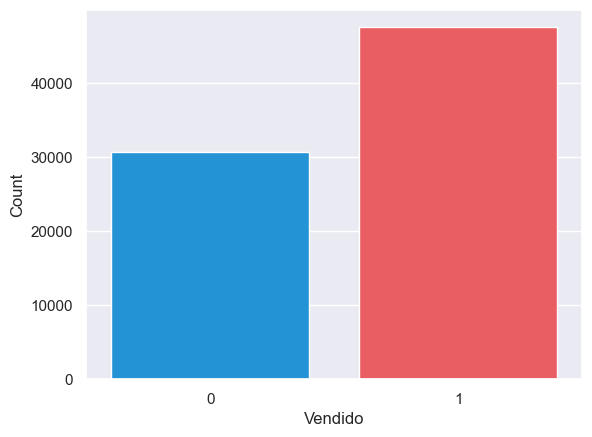

In [73]:
sns.set(style="darkgrid")
ax = sns.countplot(x="VENDIDO", data=df, palette=sns.xkcd_palette(["azure", "light red"]))
plt.xlabel('Vendido')
plt.ylabel('Count')
plt.show()

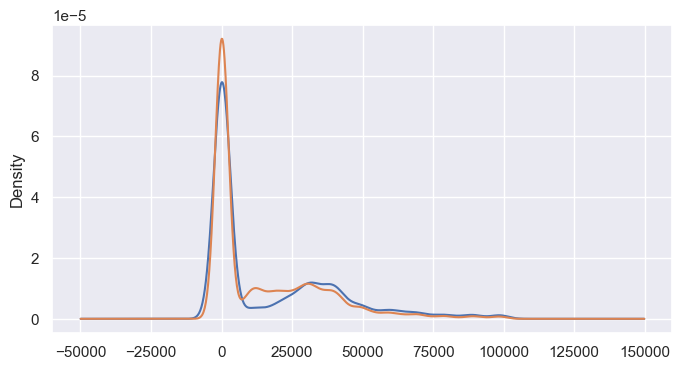

In [74]:
fig=plt.figure(figsize=(8,4))
for x in [0,1]:
    df['precoSemDesconto'][df['VENDIDO']==x].plot(kind='kde')
    


plt.show()

In [75]:
df['Tamanho'].unique()

array(['m', '38', ' 39', 'p', ' 38', ' 36', ' U', 'u', '34', ' M', '36',
       ' 42', 'g', 'pp', '42', ' 35', '40', ' P', '6', nan, '14', ' 34',
       ' 40', ' G', 'gg', '44', '3m', '50', '3', '4', ' PP', '8', '33',
       ' 6M', ' 3M', ' 10M', ' 12M', '12', '37', '35', '48', '16', ' RN',
       '2a', ' GG', ' 37', ' 44', '1', 'rn', '6m', '32', '21', '12m',
       'xgg', '18m', ' 8A', '7', ' 12A', '9m', '46', ' 2A', '5', '2',
       '39', '54', ' 20', ' 1A', ' 10A', ' 18', '10', '29', ' 4A', '30',
       ' 50', ' 6A', ' 48', ' 46', ' 16', '52', '11', ' 17', ' 33', '13',
       '22', ' 14A', '41', '20', '9', ' 21', ' 19', '31', '25', ' 41',
       '58', '17', ' 13', ' 26', '19', '28', '23', '26', ' 14', ' 4',
       '24', '43', ' 3A', ' 32', '56', ' 1', ' XLG', ' 23', ' 15', 'M',
       '27', '18', ' G3', ' 24', '15', ' 54', ' 3', ' 56', ' G4', '45',
       ' 5G', ' 28', '60', ' 27', 'P'], dtype=object)

In [76]:
for coluna in df.columns:
    # Verificando se a coluna contém dados do tipo string
    if df[coluna].dtype == 'O':  # 'O' é o código para tipo de objeto (string) em pandas
        # Removendo espaçamentos e convertendo para minúsculas
        df[coluna] = df[coluna].str.replace(' ', '').str.lower()

In [77]:
for coluna in df2.columns:
    # Verificando se a coluna contém dados do tipo string
    if df2[coluna].dtype == 'O':  # 'O' é o código para tipo de objeto (string) em pandas
        # Removendo espaçamentos e convertendo para minúsculas
        df2[coluna] = df2[coluna].str.replace(' ', '').str.lower()

In [78]:
equivalencia = {
    'pp': ['u','3','3m', 'rn', '2a', '1a', '18m', '8a', '12a','12m', '9m', '6m','4', '4a', '6a','6', '1','2','9','3a','5g'],
    'p': ['34', '35', '36', '37', '38', '39', '40', '42', '33', '32', '31', '30','7','5','18','17','14a','19'],
    'm': ['44', '46', '48', '50', '52', '54', '56', '58', '60', '29', '28', '27', '26', '25', '24', '23', '22', '21', '20','41','43'],
    'g': ['g', '8', '10', '12', '14', '16', '15', '13', '11', '10a', '10m'],
    'gg': ['xgg', 'xlg', 'g3', 'g4', '45'],
}

# Função para mapear os tamanhos
def mapear_tamanho(tamanho):
    for metrica, valores in equivalencia.items():
        if tamanho in valores:
            return metrica
    return tamanho  # Se não houver correspondência, retorna o tamanho original

# Aplicar a função de mapeamento à coluna 'tamanho' no DataFrame
df['tamanho_mapeado'] = df['Tamanho'].apply(mapear_tamanho)
df2['tamanho_mapeado'] = df2['Tamanho'].apply(mapear_tamanho)

In [79]:
df['tamanho_mapeado'].unique()

array(['m', 'p', 'pp', 'g', nan, 'gg'], dtype=object)

In [80]:
df

,marca,nomeDaPeca,precoComDesconto,precoSemDesconto,Descricao,Tamanho,Condicao,Cores,VENDIDO,tamanho_mapeado
0,semmarca,\r\nblusaverdebabados\r\n,64.00,160.0,blusaverdecommodelagembásica.peçacombabadoscur...,m,gentilmenteusada,verde,0,m
1,zara,\r\nsaialápiszara\r\n,57.00,219.0,marca:zarawoman,38,gentilmenteusada,"detalhe:doisbolsosfrontais,forro,zípertraseiro...",1,p
2,1a9,\r\njeansskinny1a9\r\n,69.00,279.0,"medidas:cintura32cm,quadril43cm,comprimento110cm",38,gentilmenteusada,azul,0,p
3,coach,sapatilhamonograma,25000.00,87500.0,"sapatilhacaramelo.possuimonogramaemtodaapeça,v...",39,usado,\r\ncaramelo\r\npreto\r\n,1,p
4,primeiroitemteen,\r\nshortsfemininoteencorações\r\n,20.97,69.9,"shortsfeminino,comestampadecorações,doprimeiro...",m,gentilmenteusada,colorido,0,m
...,...,...,...,...,...,...,...,...,...,...
78326,mandi,\r\ncamisapretamandi\r\n,15.00,69.9,"camisafeminina,preta,damandi.tecidoplano.model...",m,gentilmenteusada,preto,0,m
78327,mo,\r\nsaiabrancabordada\r\n,33.75,135.0,"saiabrancacombordadosemlinhaprata,azulevermelh...",p,gentilmenteusada,branco,1,p
78328,luigibertolli,\r\nvestidofloralpretoevermelholuigibertolli\r\n,27.48,89.9,"vestidopretocomfloresvermelhas,daluigibertolli...",gg,gentilmenteusada,colorido,1,gg
78329,zara,blazertweedbege,7000.00,28000.0,"blazeremtweed,nascoresbegeedourado.possuigolac...",p,usado,\r\nbege\r\n,1,p


In [81]:
def agrupar_cores(cor):
    if pd.isna(cor) or not isinstance(cor, str):
        return 'Desconhecido'
    cor = cor.lower().strip()
    if 'preto' in cor:
        return 'Preto'
    elif 'branco' in cor:
        return 'Branco'
    elif 'azul' in cor:
        return 'Azul'
    elif 'vermelho' in cor:
        return 'Vermelho'
    elif 'verde' in cor:
        return 'Verde'
    elif 'amarelo' in cor:
        return 'Amarelo'
    elif 'laranja' in cor:
        return 'Laranja'
    elif 'rosa' in cor:
        return 'Rosa'
    elif 'roxo' in cor or 'violeta' in cor or 'lilas' in cor:
        return 'Roxo'
    elif 'cinza' in cor:
        return 'Cinza'
    elif 'bege' in cor or 'nude' in cor:
        return 'Bege/Nude'
    elif 'jeans' in cor or 'azul jeans' in cor:
        return 'Jeans'
    elif 'animal print' in cor:
        return 'Animal Print'
    elif 'multicolorido' in cor or 'colorido' in cor:
        return 'Multicolorido'
    elif 'marsala' in cor:
        return 'Marsala'
    elif 'off-white' in cor:
        return 'Off-White'
    elif 'caramelo' in cor:
        return 'Caramelo'
    elif 'marrom' in cor:
        return 'Marrom'
    elif 'dourado' in cor:
        return 'Dourado'
    elif 'prata' in cor:
        return 'Prata'
    elif 'salmao' in cor:
        return 'Salmão'
    elif 'estampado' in cor:
        return 'Estampado'
    elif 'listrado' in cor:
        return 'Listrado'
    elif 'xadrez' in cor:
        return 'Xadrez'
    else:
        return 'Outros'

# Aplicando a função atualizada aos dados
df['Cores_Agrupadas'] = df['Cores'].apply(agrupar_cores)
df2['Cores_Agrupadas'] = df2['Cores'].apply(agrupar_cores)

In [82]:
df['Cores_Agrupadas'].value_counts()

Cores_Agrupadas
Preto            16556
Multicolorido    10045
Azul              9996
Branco            6031
Rosa              4460
Cinza             4315
Marrom            4155
Verde             4010
Vermelho          3009
Outros            2345
Jeans             2203
Bege/Nude         2033
Amarelo           1965
Desconhecido      1603
Off-White         1457
Laranja           1280
Roxo              1213
Dourado            573
Prata              385
Caramelo           304
Marsala            131
Xadrez             121
Listrado           121
Estampado           20
Name: count, dtype: int64

In [83]:
df = df.drop(['nomeDaPeca', 'Descricao',"Tamanho", "Cores"], axis= 1)

In [84]:
df

,marca,precoComDesconto,precoSemDesconto,Condicao,VENDIDO,tamanho_mapeado,Cores_Agrupadas
0,semmarca,64.00,160.0,gentilmenteusada,0,m,Verde
1,zara,57.00,219.0,gentilmenteusada,1,p,Outros
2,1a9,69.00,279.0,gentilmenteusada,0,p,Azul
3,coach,25000.00,87500.0,usado,1,p,Preto
4,primeiroitemteen,20.97,69.9,gentilmenteusada,0,m,Multicolorido
...,...,...,...,...,...,...,...
78326,mandi,15.00,69.9,gentilmenteusada,0,m,Preto
78327,mo,33.75,135.0,gentilmenteusada,1,p,Branco
78328,luigibertolli,27.48,89.9,gentilmenteusada,1,gg,Multicolorido
78329,zara,7000.00,28000.0,usado,1,p,Bege/Nude


In [85]:
# Codificação de Variáveis Categóricas
label_encoders = {}
categorical_columns = ['marca', 'Cores_Agrupadas','tamanho_mapeado','Condicao']
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
    
    

In [86]:
# Codificação de Variáveis Categóricas
label_encoders = {}
categorical_columns = ['marca', 'Cores_Agrupadas','tamanho_mapeado','Condicao']
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df2[column] = label_encoders[column].fit_transform(df2[column])

In [87]:

df

,marca,precoComDesconto,precoSemDesconto,Condicao,VENDIDO,tamanho_mapeado,Cores_Agrupadas
0,8601,64.00,160.0,0,0,2,21
1,10361,57.00,219.0,0,1,3,16
2,18,69.00,279.0,0,0,3,1
3,2160,25000.00,87500.0,4,1,3,18
4,7807,20.97,69.9,0,0,2,14
...,...,...,...,...,...,...,...
78326,6062,15.00,69.9,0,0,2,18
78327,6656,33.75,135.0,0,1,3,3
78328,5802,27.48,89.9,0,1,1,14
78329,10361,7000.00,28000.0,4,1,3,2


In [88]:
df2 = df2.drop(['nomeDaPeca', 'Descricao',"Tamanho", "Cores",'Unnamed: 0'], axis= 1)
df2

,marca,precoComDesconto,precoSemDesconto,Condicao,tamanho_mapeado,Cores_Agrupadas
0,1462,64.00,160.0,2,5,2
1,2574,57.00,219.0,0,4,5
2,421,69.00,279.0,0,5,16
3,5782,25000.00,87500.0,4,6,16
4,5940,20.97,69.9,4,4,18
...,...,...,...,...,...,...
38577,4355,10000.00,32000.0,0,5,19
38578,4944,12000.00,36000.0,2,5,0
38579,5319,13800.00,45900.0,0,5,12
38580,451,11.96,29.9,0,5,14


In [89]:
df['precoSemDesconto'].fillna(df['precoSemDesconto'].mean(), inplace=True)

In [90]:
moda_tamanho = df['tamanho_mapeado'].mode().iloc[0]
df['tamanho_mapeado'].fillna(moda_tamanho, inplace=True)


In [91]:
moda_tamanho = df2['tamanho_mapeado'].mode().iloc[0]
df2['tamanho_mapeado'].fillna(moda_tamanho, inplace=True)


In [92]:
df2['precoSemDesconto'].fillna(df2['precoSemDesconto'].mean(), inplace=True)

In [93]:
X = df.drop(['VENDIDO'], axis=1)
y = df['VENDIDO']

In [94]:
df

,marca,precoComDesconto,precoSemDesconto,Condicao,VENDIDO,tamanho_mapeado,Cores_Agrupadas
0,8601,64.00,160.0,0,0,2,21
1,10361,57.00,219.0,0,1,3,16
2,18,69.00,279.0,0,0,3,1
3,2160,25000.00,87500.0,4,1,3,18
4,7807,20.97,69.9,0,0,2,14
...,...,...,...,...,...,...,...
78326,6062,15.00,69.9,0,0,2,18
78327,6656,33.75,135.0,0,1,3,3
78328,5802,27.48,89.9,0,1,1,14
78329,10361,7000.00,28000.0,4,1,3,2


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [103]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [97]:
print(df.isnull().sum())

marca               0
precoComDesconto    0
precoSemDesconto    0
Condicao            0
VENDIDO             0
tamanho_mapeado     0
Cores_Agrupadas     0
dtype: int64


In [98]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict, cross_val_score, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [99]:
y_train = y_train.values.ravel()

Training and evaluating Random Forest...
Random Forest Classification Report:
              precision    recall  f1-score   support

     class 0       0.53      0.42      0.47      9253
     class 1       0.67      0.76      0.71     14247

    accuracy                           0.63     23500
   macro avg       0.60      0.59      0.59     23500
weighted avg       0.62      0.63      0.62     23500



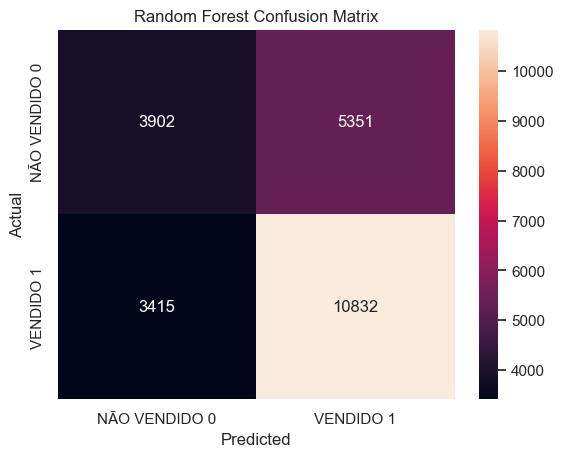

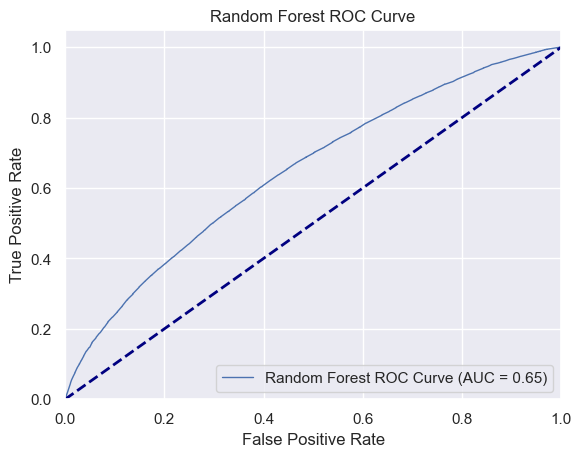

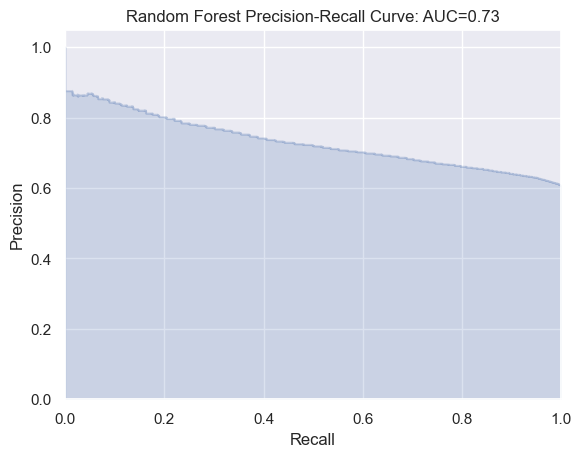

Random Forest Accuracy: 0.63
Training and evaluating Logistic Regression...
Logistic Regression Classification Report:
              precision    recall  f1-score   support

     class 0       0.52      0.06      0.10      9253
     class 1       0.61      0.97      0.75     14247

    accuracy                           0.61     23500
   macro avg       0.57      0.51      0.43     23500
weighted avg       0.58      0.61      0.50     23500



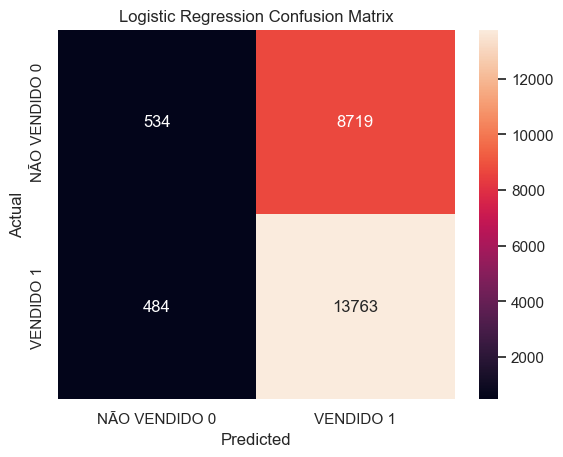

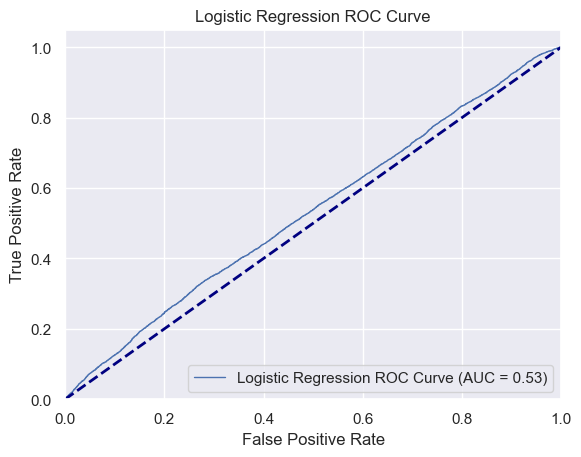

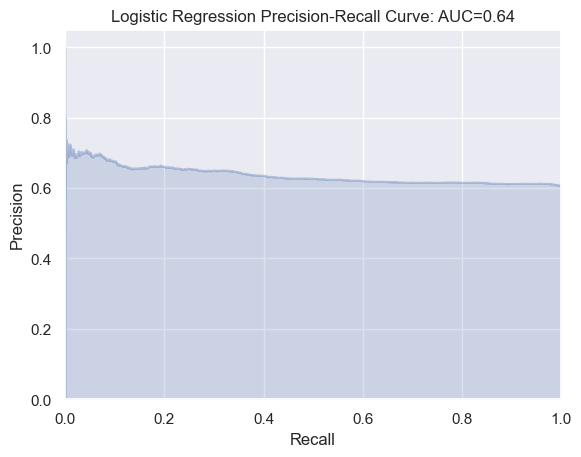

Logistic Regression Accuracy: 0.61
Training and evaluating KNN...
KNN Classification Report:
              precision    recall  f1-score   support

     class 0       0.49      0.42      0.45      9253
     class 1       0.66      0.72      0.69     14247

    accuracy                           0.60     23500
   macro avg       0.57      0.57      0.57     23500
weighted avg       0.59      0.60      0.59     23500



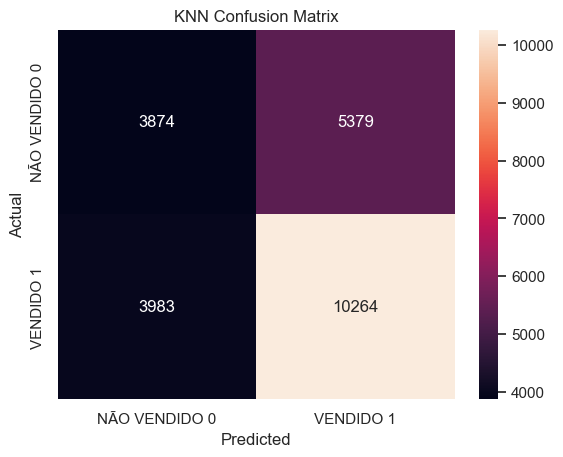

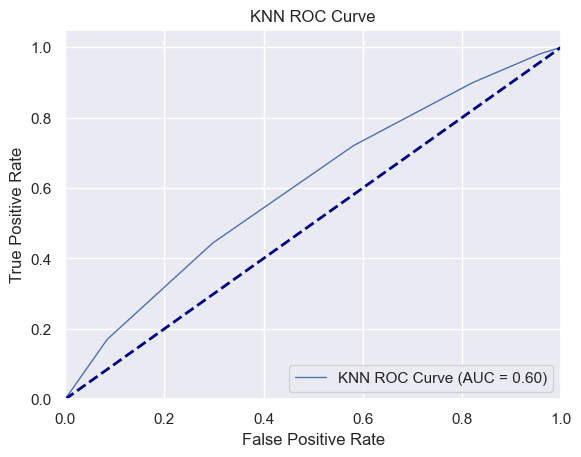

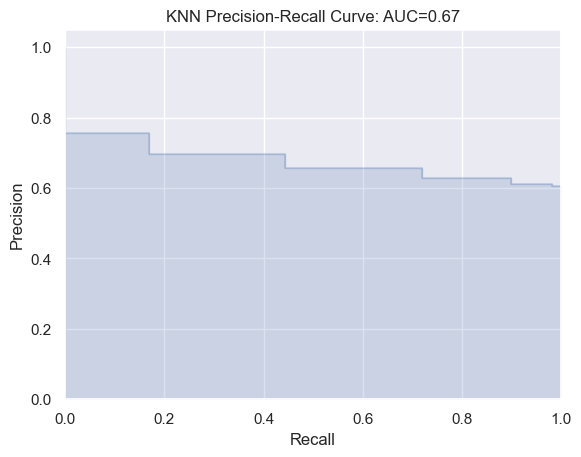

KNN Accuracy: 0.60
Training and evaluating Gaussian Naïve Bayes...
Gaussian Naïve Bayes Classification Report:
              precision    recall  f1-score   support

     class 0       0.52      0.14      0.22      9253
     class 1       0.62      0.92      0.74     14247

    accuracy                           0.61     23500
   macro avg       0.57      0.53      0.48     23500
weighted avg       0.58      0.61      0.53     23500



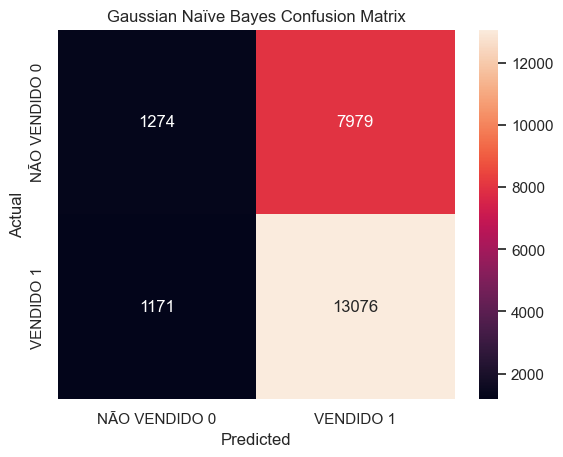

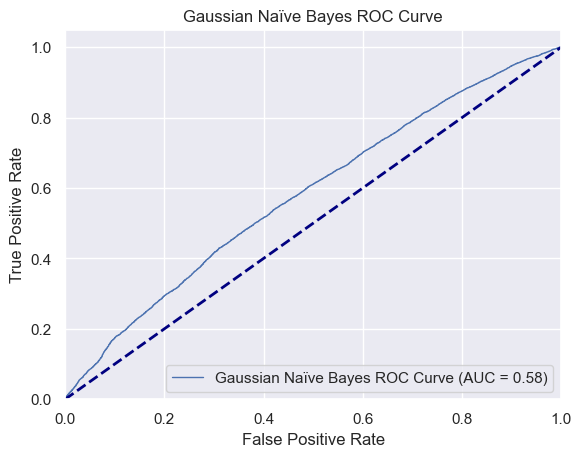

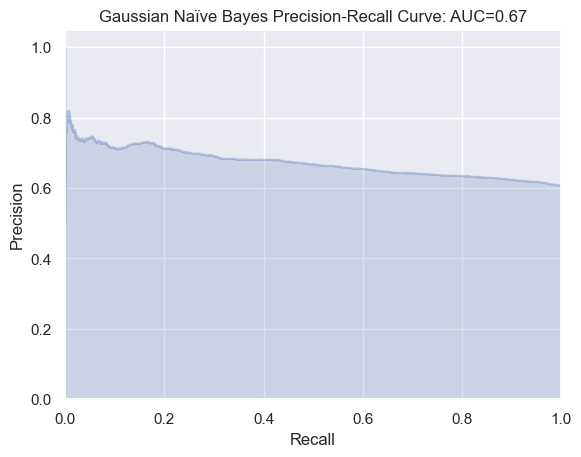

Gaussian Naïve Bayes Accuracy: 0.61
Training and evaluating Decision Tree Classifier...
Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

     class 0       0.47      0.48      0.48      9253
     class 1       0.66      0.65      0.66     14247

    accuracy                           0.58     23500
   macro avg       0.57      0.57      0.57     23500
weighted avg       0.59      0.58      0.59     23500



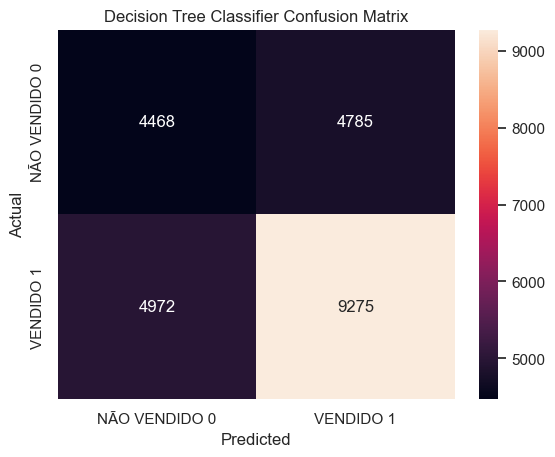

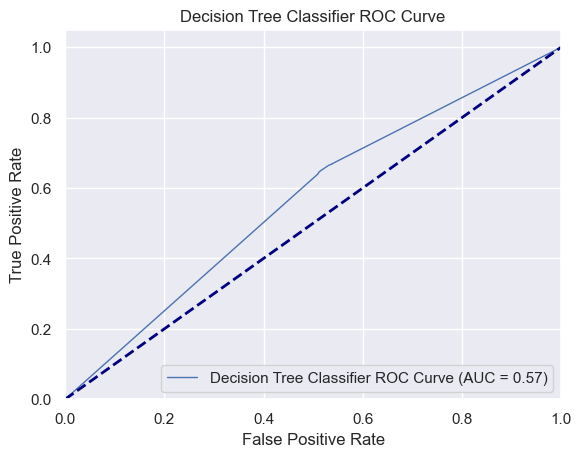

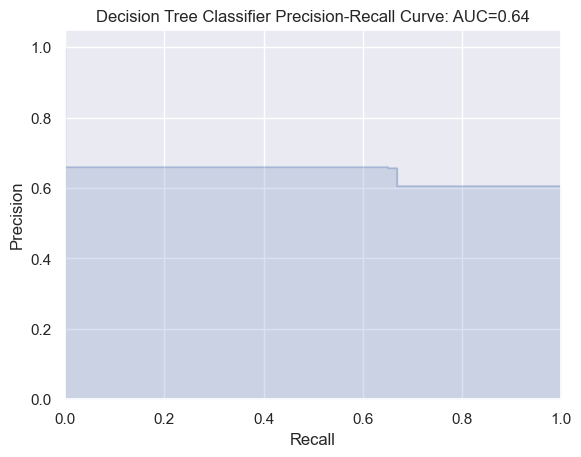

Decision Tree Classifier Accuracy: 0.58
Training and evaluating XGBoost...
XGBoost Classification Report:
              precision    recall  f1-score   support

     class 0       0.58      0.38      0.46      9253
     class 1       0.67      0.82      0.74     14247

    accuracy                           0.65     23500
   macro avg       0.63      0.60      0.60     23500
weighted avg       0.64      0.65      0.63     23500



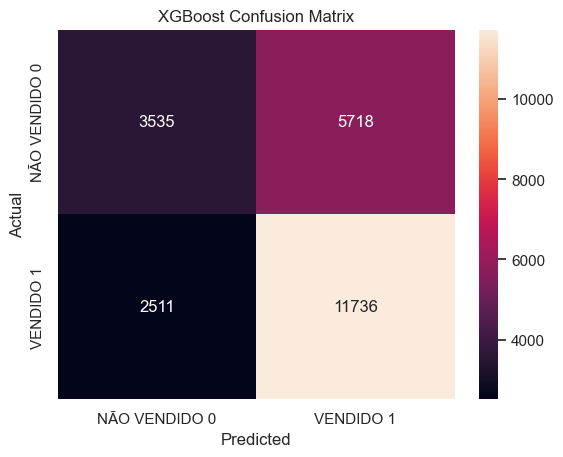

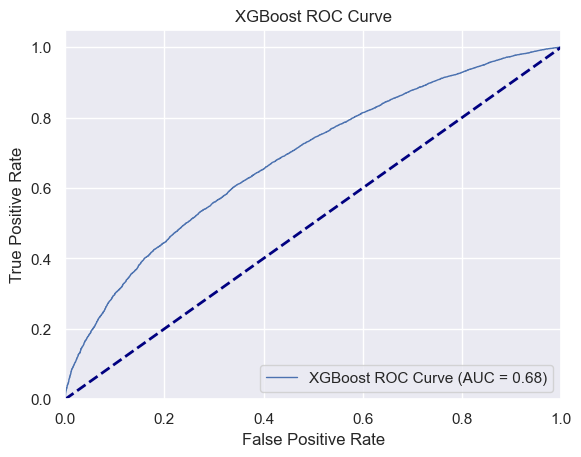

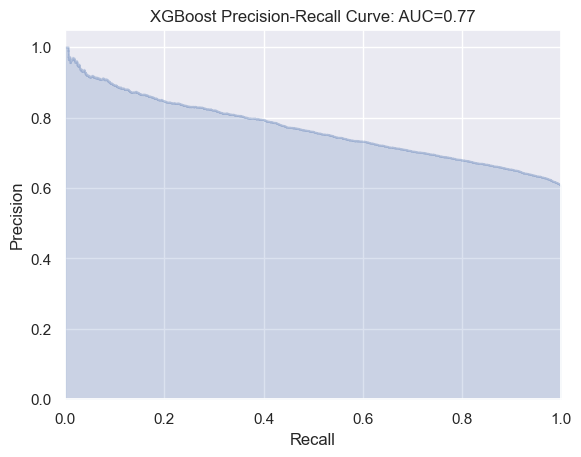

XGBoost Accuracy: 0.65
Training and evaluation of all models completed.


In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier  # Adicionando XGBoost
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import LabelBinarizer

# Lista de modelos
models = [
    ('Random Forest', RandomForestClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Gaussian Naïve Bayes', GaussianNB()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('XGBoost', XGBClassifier())  # Adicionando XGBoost
]

for name, model in models:
    print(f"Training and evaluating {name}...")

    # Divisão dos dados em conjuntos de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Treinamento do modelo
    model.fit(X_train, y_train)

    # Previsões no conjunto de teste
    y_pred = model.predict(X_test)

    # Estatísticas
    target_names = ['class 0', 'class 1']

    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='rocket', xticklabels=['NÃO VENDIDO 0', 'VENDIDO 1'],
                yticklabels=['NÃO VENDIDO 0', 'VENDIDO 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} Confusion Matrix')
    plt.show()

    # Curva ROC
    if name != 'SVM':  # SVM não suporta probabilidade
        y_score = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, lw=1, label=f'{name} ROC Curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{name} ROC Curve')
        plt.legend(loc='lower right')
        plt.show()

        # Curva Precision-Recall
        precision, recall, _ = precision_recall_curve(y_test, y_score)
        average_precision = average_precision_score(y_test, y_score)

        plt.figure()
        plt.step(recall, precision, color='b', alpha=0.2, where='post')
        plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.title(f'{name} Precision-Recall Curve: AUC={average_precision:0.2f}')
        plt.show()

    accuracy = np.sum(y_pred == y_test) / len(y_test)
    print(f"{name} Accuracy: {accuracy:.2f}")

print("Training and evaluation of all models completed.")


Training and evaluating Random Forest...
Random Forest Classification Report:
              precision    recall  f1-score   support

     class 0       0.53      0.41      0.46     21506
     class 1       0.67      0.76      0.71     33325

    accuracy                           0.62     54831
   macro avg       0.60      0.59      0.59     54831
weighted avg       0.61      0.62      0.61     54831



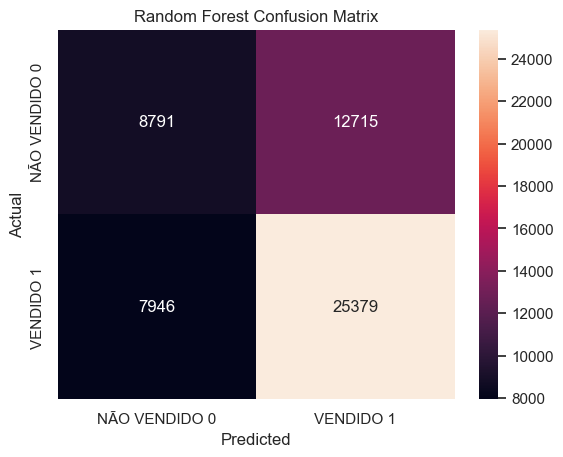

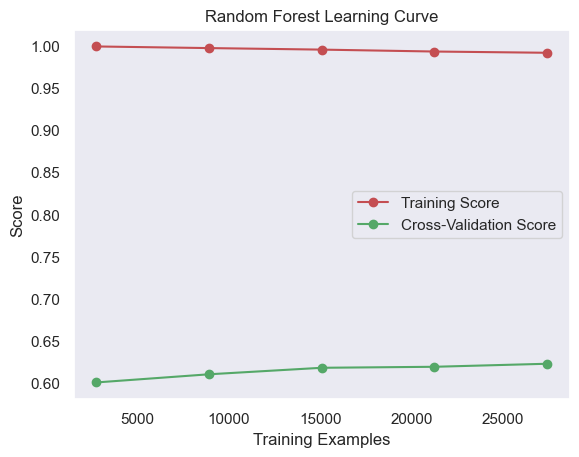

c:\Users\FilipeCampos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\FilipeCampos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


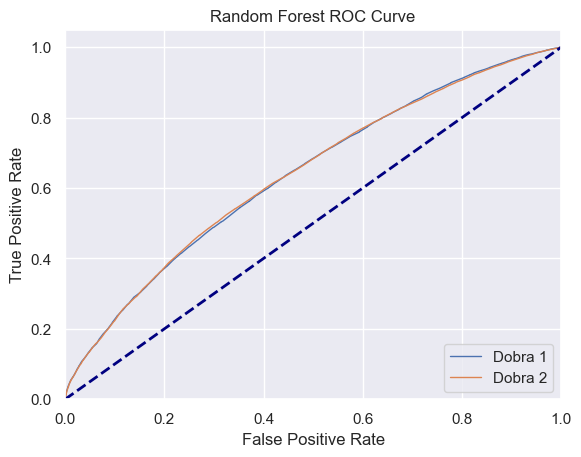

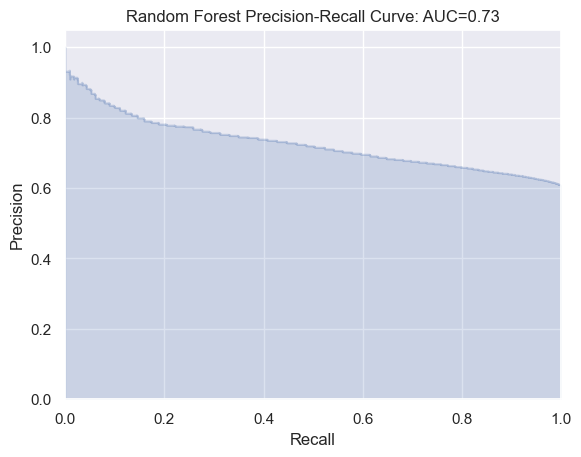

Random Forest Accuracy: 0.62
Training and evaluating Logistic Regression...
Logistic Regression Classification Report:
              precision    recall  f1-score   support

     class 0       0.56      0.09      0.16     21506
     class 1       0.62      0.95      0.75     33325

    accuracy                           0.62     54831
   macro avg       0.59      0.52      0.45     54831
weighted avg       0.60      0.62      0.52     54831



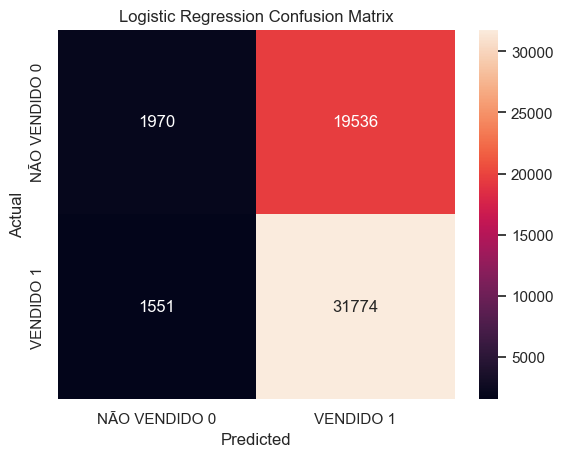

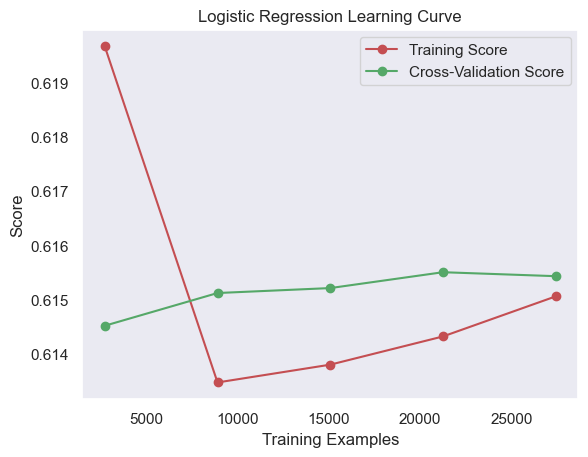

c:\Users\FilipeCampos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\FilipeCampos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


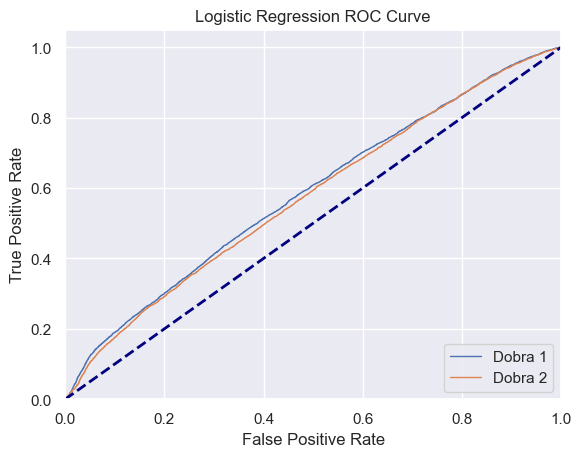

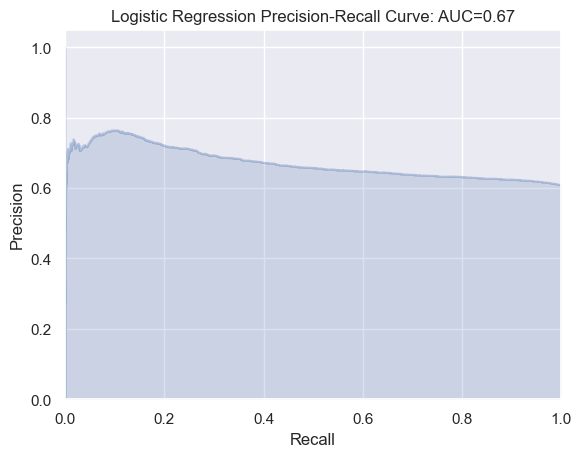

Logistic Regression Accuracy: 0.62
Training and evaluating KNN...
KNN Classification Report:
              precision    recall  f1-score   support

     class 0       0.47      0.38      0.42     21506
     class 1       0.64      0.72      0.68     33325

    accuracy                           0.59     54831
   macro avg       0.56      0.55      0.55     54831
weighted avg       0.57      0.59      0.58     54831



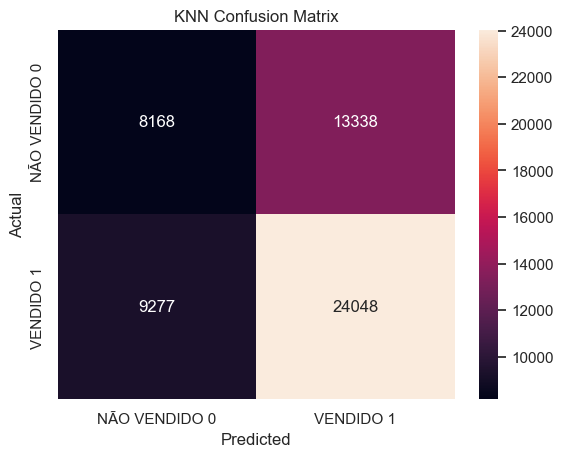

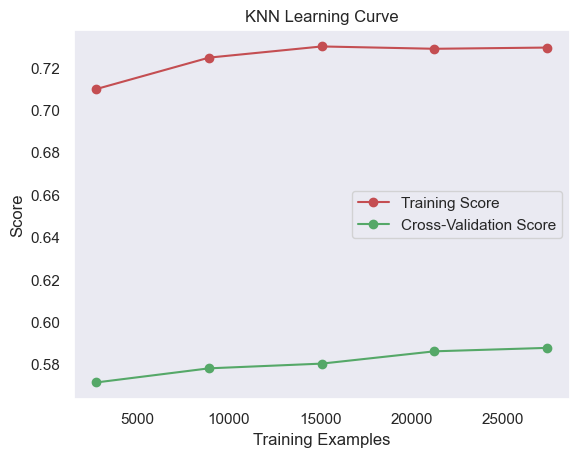

c:\Users\FilipeCampos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\FilipeCampos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


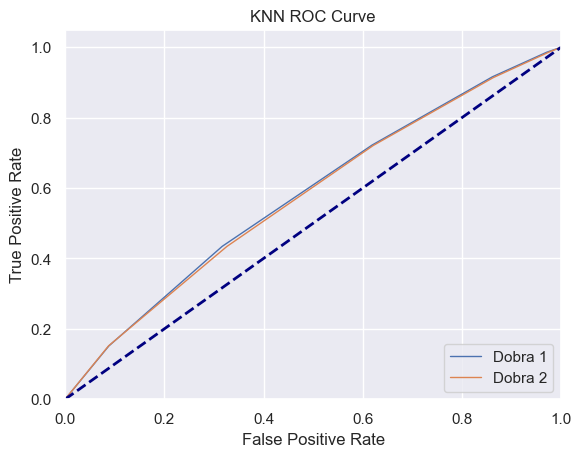

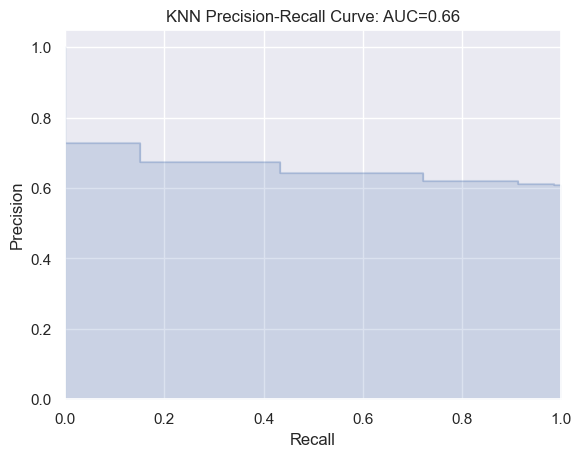

KNN Accuracy: 0.59
Training and evaluating Gaussian Naïve Bayes...
Gaussian Naïve Bayes Classification Report:
              precision    recall  f1-score   support

     class 0       0.52      0.14      0.22     21506
     class 1       0.62      0.92      0.74     33325

    accuracy                           0.61     54831
   macro avg       0.57      0.53      0.48     54831
weighted avg       0.58      0.61      0.54     54831



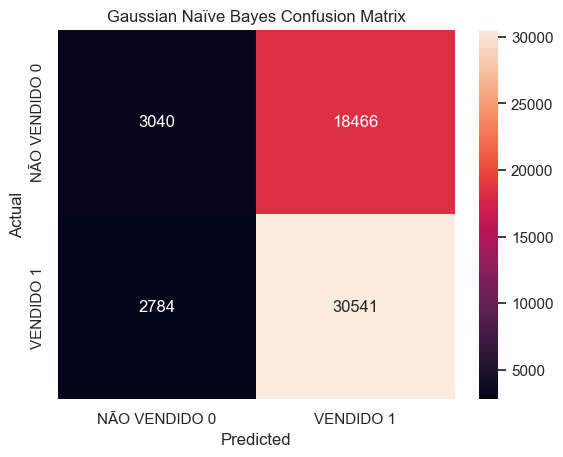

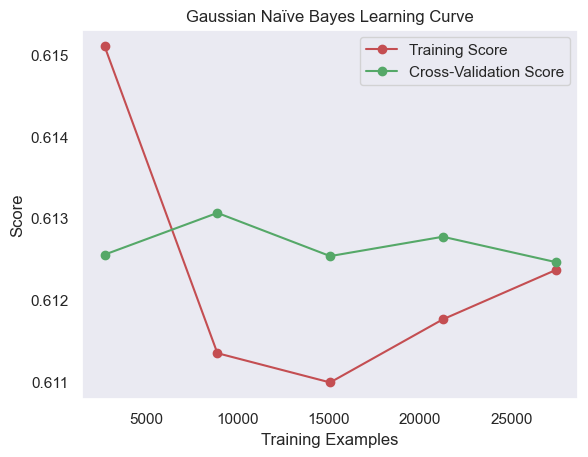

c:\Users\FilipeCampos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\FilipeCampos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


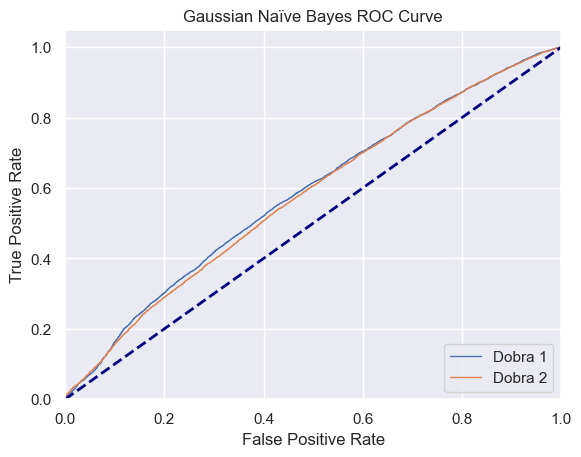

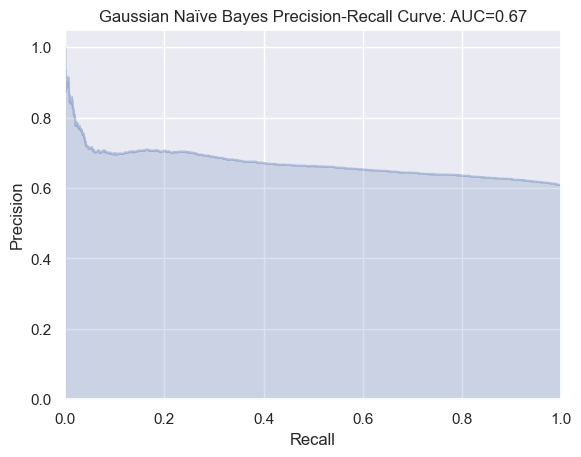

Gaussian Naïve Bayes Accuracy: 0.61
Training and evaluating Decision Tree Classifier...
Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

     class 0       0.46      0.48      0.47     21506
     class 1       0.66      0.64      0.65     33325

    accuracy                           0.58     54831
   macro avg       0.56      0.56      0.56     54831
weighted avg       0.58      0.58      0.58     54831



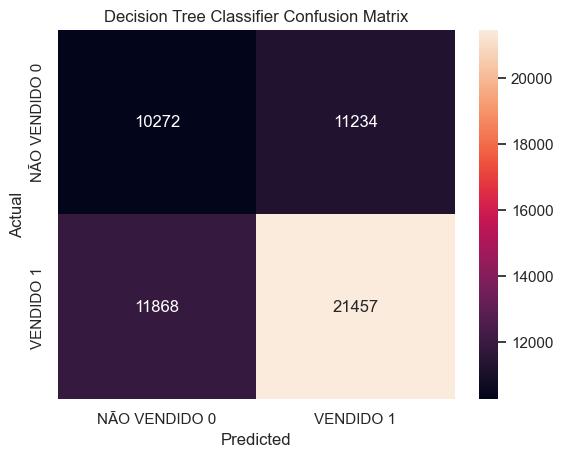

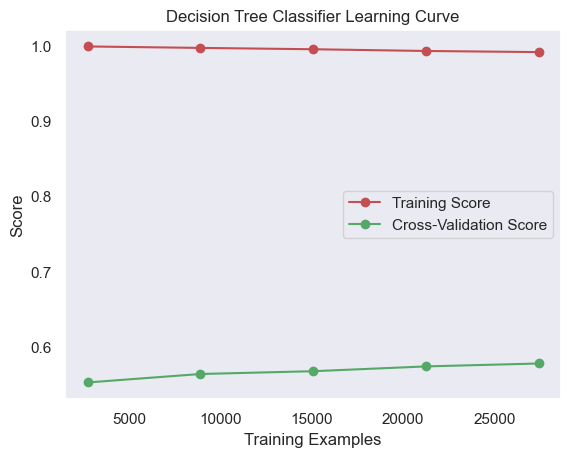

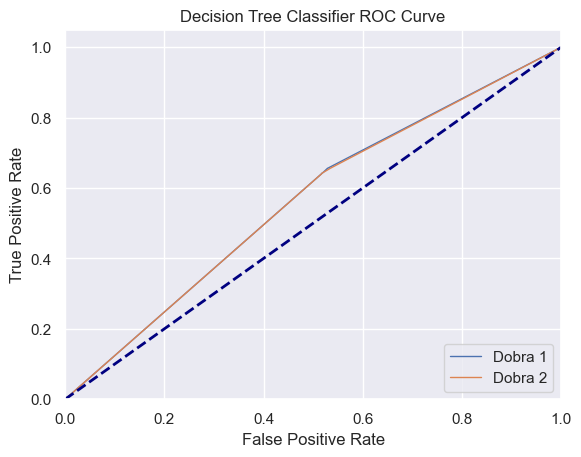

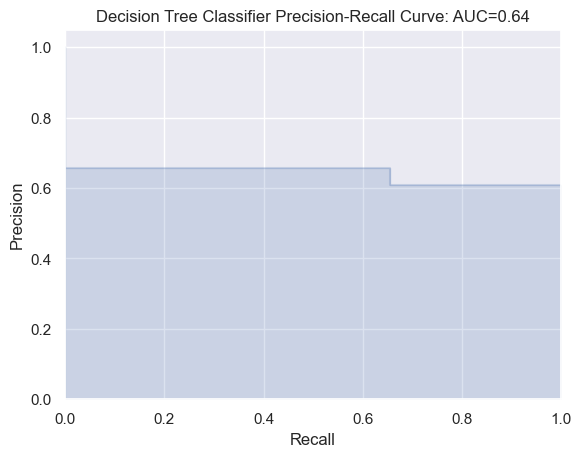

Decision Tree Classifier Accuracy: 0.58
Training and evaluation of all models completed.


In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, learning_curve, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import LabelBinarizer

# Lista de modelos
models = [
    ('Random Forest', RandomForestClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Gaussian Naïve Bayes', GaussianNB()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
]

for name, model in models:
    print(f"Training and evaluating {name}...")

    # Treinamento e avaliação usando validação cruzada
    y_pred = cross_val_predict(model, X_train, y_train, cv=2)
    accuracy = cross_val_score(model, X_train, y_train, cv=2, scoring='accuracy')

    # Estatísticas
    target_names = ['class 0', 'class 1']

    # Em seguida, use os rótulos de classe corrigidos no seu código
    print(f"{name} Classification Report:")
    print(classification_report(y_train, y_pred, target_names=target_names))

    # Matriz de Confusão
    cm = confusion_matrix(y_train, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='rocket', xticklabels=['NÃO VENDIDO 0','VENDIDO 1'], yticklabels=['NÃO VENDIDO 0','VENDIDO 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} Confusion Matrix')
    plt.show()

    # Curva de Aprendizado
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=2, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.title(f'{name} Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')

    plt.legend(loc='best')
    plt.show()

    # Curva ROC (fora do loop de validação cruzada)
    if name != 'SVM':  # SVM não suporta probabilidade
        lb = LabelBinarizer()
        y_bin = lb.fit_transform(y_train)
        
        # Use StratifiedKFold para manter a proporção de classes na validação cruzada
        cv = StratifiedKFold(n_splits=2)
        tpr_list = []
        fpr_list = []
        roc_auc_list = []
        
        for train_idx, test_idx in cv.split(X_train, y_train):
            X_train_fold, X_test_fold = X_train[train_idx], X_train[test_idx]
            y_train_fold, y_test_fold = y_bin[train_idx], y_bin[test_idx]
            
            model.fit(X_train_fold, y_train_fold)
            y_score = model.predict_proba(X_test_fold)
            fpr, tpr, _ = roc_curve(y_test_fold.ravel(), y_score[:, 1].ravel())
            roc_auc = auc(fpr, tpr)
            
            tpr_list.append(tpr)
            fpr_list.append(fpr)
            roc_auc_list.append(roc_auc)
        
        # Plot a curva ROC para cada dobra individual
        plt.figure()
        for i in range(len(tpr_list)):
            plt.plot(fpr_list[i], tpr_list[i], lw=1, label=f'Dobra {i+1}')
        
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{name} ROC Curve')
        plt.legend(loc='lower right')
        plt.show()

        # Curva Precision-Recall
        precision, recall, _ = precision_recall_curve(y_test_fold, y_score[:, 1])
        average_precision = average_precision_score(y_test_fold, y_score[:, 1])

        plt.figure()
        plt.step(recall, precision, color='b', alpha=0.2, where='post')
        plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.title(f'{name} Precision-Recall Curve: AUC={average_precision:0.2f}')
        plt.show()

    accuracy_mean = accuracy.mean()
    print(f"{name} Accuracy: {accuracy_mean:.2f}")

print("Training and evaluation of all models completed.")


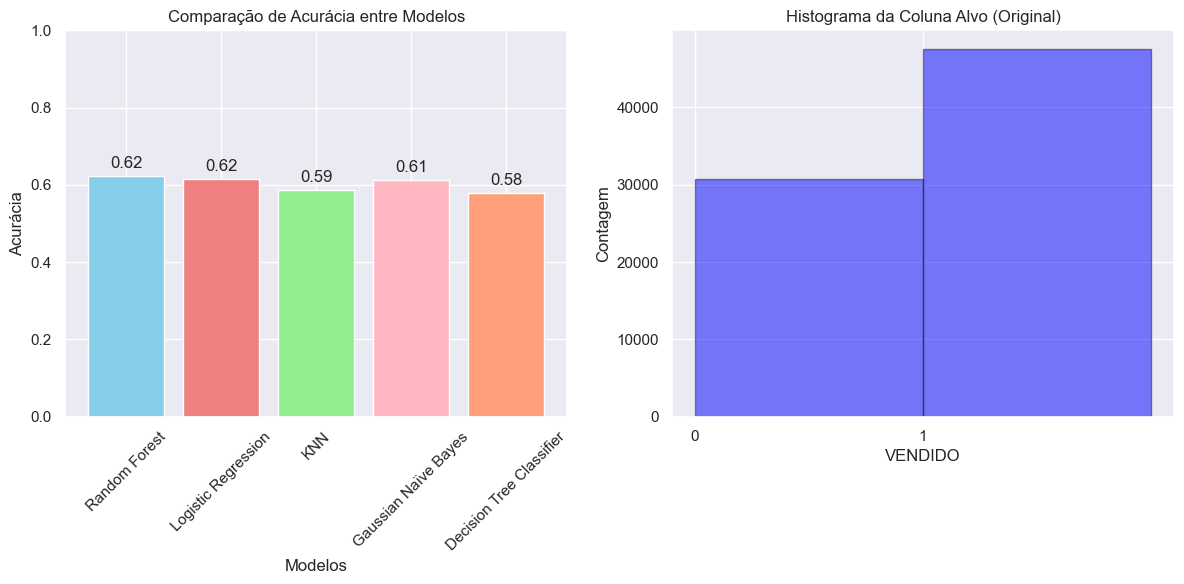

In [105]:
import matplotlib.pyplot as plt
import pandas as pd

# Crie uma lista para armazenar os resultados de cada modelo
model_names = []
accuracies = []

for name, model in models:
    # Treinamento e avaliação usando validação cruzada
    y_pred = cross_val_predict(model, X_train, y_train, cv=2)
    accuracy = accuracy_score(y_train, y_pred)
    
    # Armazene os resultados do modelo atual
    model_names.append(name)
    accuracies.append(accuracy)

# Crie um gráfico de barras para comparar as precisões de cada modelo
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

# Defina cores para as barras
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightpink', 'lightsalmon', 'lightseagreen']

plt.bar(model_names, accuracies, color=colors)
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácia entre Modelos')
plt.ylim(0, 1.0)  # Defina o limite vertical de 0 a 1 para a precisão
plt.xticks(rotation=45)  # Rode os nomes dos modelos para facilitar a leitura

# Adicione as barras de precisão acima das barras
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.02, f'{accuracy:.2f}', ha='center')

# Histograma da coluna alvo do dataset original
plt.subplot(1, 2, 2)
plt.hist(df['VENDIDO'], bins=[0, 1, 2], edgecolor='k', alpha=0.5, color='blue')
plt.xticks([0, 1])
plt.xlabel('VENDIDO')
plt.ylabel('Contagem')
plt.title('Histograma da Coluna Alvo (Original)')

plt.tight_layout()
plt.show()


In [109]:
import joblib
for model_name, model in models:
    joblib.dump(model, f'{model_name}_model.joblib')

In [110]:
nome_do_arquivo = 'treino_alterado_final.csv'
nome_do_arquivo2 = 'teste_alterado_final.csv'
df.to_csv(nome_do_arquivo, index=False)
df2.to_csv(nome_do_arquivo2, index=False)

In [113]:
import os
from zipfile import ZipFile

# Obtenha a lista de arquivos na pasta local
pasta_local = 'C:/Users/FilipeCampos/Desktop/gestao-ia'  # Pode ser substituído pelo caminho da sua pasta
lista_de_arquivos = os.listdir(pasta_local)

# Nome do arquivo ZIP de saída
nome_do_arquivo_zip = 'TrabalhoIa.zip'

# Crie e abra um arquivo ZIP para escrita
with ZipFile(nome_do_arquivo_zip, 'w') as zipf:
    # Adicione cada arquivo da lista à pasta no arquivo ZIP
    for arquivo in lista_de_arquivos:
        caminho_completo = os.path.join(pasta_local, arquivo)
        zipf.write(caminho_completo, arquivo)

print(f'Todos os arquivos na pasta local foram salvos no arquivo {nome_do_arquivo_zip}.')

Todos os arquivos na pasta local foram salvos no arquivo TrabalhoIa.zip.
